### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from sklearn import metrics
from scipy.stats import norm
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.linear_model import LinearRegression
from math import sqrt

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data Reading

In [2]:
df=pd.read_csv(r'C:\Users\Admin\CD Project\Data.csv',encoding = 'latin',header=None,names=['target','id','time','query','user','tweet'])

In [3]:
df.columns

Index(['target', 'id', 'time', 'query', 'user', 'tweet'], dtype='object')

In [4]:
df.head()

,target,id,time,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df = df[['target','tweet']]
df['target'] = df['target'].replace(4,1)

In [6]:
df.head()

,target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


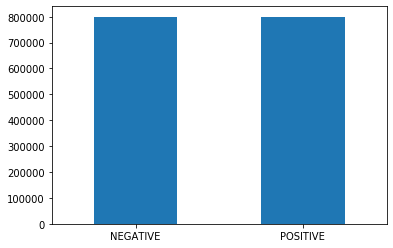

In [7]:
mapping = {0: "NEGATIVE",1: "POSITIVE"}
def sentiment(label):
    return mapping[int(label)]
df.target = df.target.apply(lambda x: sentiment(x))
count_classes = pd.value_counts(df['target'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

In [8]:
text, sentiment = df['tweet'], df['target']

In [9]:
import re
from nltk.stem import WordNetLemmatizer
wordLemm = WordNetLemmatizer()
def preprocess_tweet(data):
    preprocessed=[]
    for tweet in data:
        tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
        tweet = re.sub('@[^\s]+','AT_USER', tweet)
        tweet = re.sub('[\s]+', ' ', tweet)
        tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
        tweet = re.sub("[^a-zA-Z0-9]"," ",tweet)
        sequencePattern   = r"(.)\1\1+"
        seqReplacePattern = r"\1\1"
        tweet = re.sub(sequencePattern,seqReplacePattern,tweet)
        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
        preprocessed.append(tweetwords)
    return preprocessed

In [10]:
processedtext = preprocess_tweet(text)
processedtext

['AT USER URL Aww that bummer You shoulda got David Carr of Third Day to do it ',
 'is upset that he can update his Facebook by texting it and might cry a result School today also Blah ',
 'AT USER dived many time for the ball Managed to save 50 The rest go out of bound ',
 'my whole body feel itchy and like it on fire ',
 'AT USER no it not behaving at all mad why am here because can see you all over there ',
 'AT USER not the whole crew ',
 'Need hug ',
 'AT USER hey long time no see Yes Rains bit only bit LOL fine thanks how you ',
 'AT USER nope they didn have it ',
 'AT USER que me muera ',
 'spring break in plain city it snowing ',
 'just re pierced my ear ',
 'AT USER couldn bear to watch it And thought the UA loss wa embarrassing ',
 'AT USER It it count idk why did either you never talk to me anymore ',
 'AT USER would ve been the first but didn have gun not really though zac snyder just doucheclown ',
 'AT USER wish got to watch it with you miss you and AT USER how wa the pre

In [11]:
processedtext=np.array(processedtext)
processedtext.shape

(1600000,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,test_size = 0.30, random_state = 0)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names())) 

No. of feature_words:  500000


In [14]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [72]:
print('Train Values')
print(X_train.shape)
print(y_train.shape)
print("------------------")
print("Test values")
print(X_test.shape)
print(y_test.shape)

Train Values
(1120000, 500000)
(1120000,)
------------------
Test values
(480000, 500000)
(480000,)


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
XGB=LogisticRegression()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
print("LogisticRegression:\n",metrics.classification_report(y_test,pred))

LogisticRegression:
               precision    recall  f1-score   support

    NEGATIVE       0.83      0.81      0.82    239877
    POSITIVE       0.82      0.83      0.83    240123

    accuracy                           0.82    480000
   macro avg       0.82      0.82      0.82    480000
weighted avg       0.82      0.82      0.82    480000



In [19]:
print("LogisticRegression ACCURACY:",metrics.accuracy_score(y_test,pred))

LogisticRegression ACCURACY: 0.8241208333333333


In [20]:
def model_e(model):
    
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    

              precision    recall  f1-score   support

    NEGATIVE       0.83      0.82      0.82    239877
    POSITIVE       0.82      0.83      0.83    240123

    accuracy                           0.82    480000
   macro avg       0.83      0.82      0.82    480000
weighted avg       0.83      0.82      0.82    480000



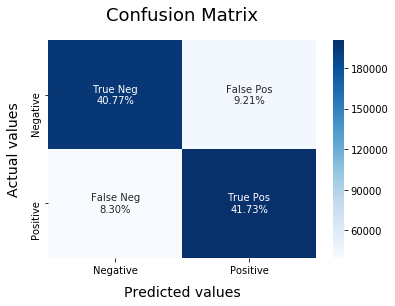

In [24]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_e(LRmodel)

In [25]:
import pickle
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

In [85]:
def load_models():

    file = open(r"C:\Users\Admin\CD Project\vectoriser-ngram-(1,2).pickle")
    vectoriser = pickle.load(file)
    file.close()
    
    file = open(r'C:\Users\Admin\CD Project\Sentiment-LR.pickle')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

def predict(vectoriser, model, text):
   
    textdata = vectoriser.transform(preprocess_tweet(text))
    sentiment = model.predict(textdata)
    
    
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
   
    df = pd.DataFrame(data, columns = ['Tweet','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
   
    text = ["Today @maths exam is Best",
            "@vicky is a bad boy!",
            "Hurray!! offer !! visit www.amazon.com",
            "@DonaldTrump will lose his election",
           "#Number of deaths is increasing due to corona virus"]
    
    
    df = predict(vectoriser, LRmodel, text)
    print(df.head())

                                               Tweet sentiment
0                          Today @maths exam is Best  POSITIVE
1                               @vicky is a bad boy!  NEGATIVE
2             Hurray!! offer !! visit www.amazon.com  POSITIVE
3                @DonaldTrump will lose his election  NEGATIVE
4  #Number of deaths is increasing due to corona ...  NEGATIVE
